# 1. DFA's Strategy

1. 
(a) DFA believes that premiums in the market are captured by adhering to the insights provided by academic research, particularly focusing on factors such as size and book-to-market ratios. DFA’s strategy relies on tilting portfolios toward small-cap and value stocks, based on empirical findings that these stocks tend to outperform in the long run.

(b) DFA’s strategy is based primarily on the belief in efficient markets rather than individual equity analysis. Their approach assumes that markets reflect available information, and any excess returns can be systematically captured by tilting portfolios toward factors such as small size and high book-to-market ratios. Macroeconomic fundamentals are less of a focus compared to the systematic factors derived from market behavior. 

(c) DFA’s funds are often described as "passive with a twist." While they do not engage in active stock picking, their funds are not purely passive either. DFA tilts portfolios toward small-cap and value stocks, following academic research, and therefore applies a systematic strategy that is more dynamic than traditional passive indexing.

(d) A "value" stock is one that has a high book-to-market equity ratio (high BE/ME), indicating that its market price is low relative to its book value. These stocks are often perceived as undervalued. A "growth" stock, by contrast, has a low book-to-market ratio (low BE/ME) and is priced higher relative to its book value, often reflecting high expected growth prospects.

2. 
(a) In the 1980s, DFA faced a challenge with the performance of small stocks, which had historically outperformed, but during this period they underperformed relative to large-cap stocks. This led to criticisms regarding the timing of DFA’s investments in small-cap stocks.

(b) In the 1990s, the main challenge for DFA was the rise of high-growth technology stocks, which outperformed value stocks. DFA's focus on value stocks led to underperformance, particularly during the dot-com boom, as tech-heavy growth stocks became more popular and outpaced value strategies.




3. 
(a) 
There are 207 firms considered "large cap" in the universe of 5020 firms. These firms account for 70% of the market value.

(b) Despite the U.S. value factor (HML) underperforming the broader U.S. equity market during 1926-2001, the value factor may still be of interest because:

1. Value stocks have historically offered higher returns than growth stocks in specific periods, such as between 1963 and 1981.

2. The value premium is believed to compensate investors for the additional risk inherent in value stocks.

3. Academic research suggests that value stocks are often underpriced relative to their fundamentals, creating opportunities for long-term investors.


# 2. The Factors

## 1. 

In [33]:
import pandas as pd
import numpy as np

file_path = '/Users/apple/Desktop/Uchicago/finm-portfolio-2024/data/dfa_analysis_data.xlsx'
factors_data = pd.read_excel(file_path, sheet_name='factors', parse_dates=['Date'])
factors_data.head()

,Date,Mkt-RF,SMB,HML,RF
0,1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1,1926-08-31,0.0264,-0.0117,0.0382,0.0025
2,1926-09-30,0.0036,-0.0140,0.0013,0.0023
3,1926-10-31,-0.0324,-0.0009,0.0070,0.0032
4,1926-11-30,0.0253,-0.0010,-0.0051,0.0031


In [34]:
# Convert 'Date' to datetime if necessary (depends on data type in file)
factors_data['Date'] = pd.to_datetime(factors_data['Date'], errors='coerce')

# Filter data by the three time periods
subsample_1 = factors_data[factors_data['Date'] < '1980-01-01']
subsample_2 = factors_data[(factors_data['Date'] >= '1981-01-01') & (factors_data['Date'] <= '2001-12-31')]
subsample_3 = factors_data[factors_data['Date'] > '2002-01-01']

# Function to calculate performance statistics
def calculate_statistics(df, column):
    mean = df[column].mean()
    volatility = df[column].std()
    sharpe = mean / volatility
    var_5 = np.percentile(df[column], 5)
    
    return mean, volatility, sharpe, var_5

# Calculate stats for each subsample
mean_1, vol_1, sharpe_1, var_1 = calculate_statistics(subsample_1, 'Mkt-RF')
mean_2, vol_2, sharpe_2, var_2 = calculate_statistics(subsample_2, 'Mkt-RF')
mean_3, vol_3, sharpe_3, var_3 = calculate_statistics(subsample_3, 'Mkt-RF')

In [35]:
# Function to calculate performance statistics
def calculate_statistics(df, column):
    mean = df[column].mean()
    volatility = df[column].std()
    sharpe = mean / volatility
    var_5 = np.percentile(df[column], 5)
    
    return mean, volatility, sharpe, var_5

# Calculate stats for each subsample
mean_1, vol_1, sharpe_1, var_1 = calculate_statistics(subsample_1, 'Mkt-RF')
mean_2, vol_2, sharpe_2, var_2 = calculate_statistics(subsample_2, 'Mkt-RF')
mean_3, vol_3, sharpe_3, var_3 = calculate_statistics(subsample_3, 'Mkt-RF')

# Output the statistics
print("Subsample 1 (Beginning - 1980):")
print(f"Mean: {mean_1:.4f}, Volatility: {vol_1:.4f}, Sharpe: {sharpe_1:.4f}, VaR(5%): {var_1:.4f}")

print("\nSubsample 2 (1981 - 2001):")
print(f"Mean: {mean_2:.4f}, Volatility: {vol_2:.4f}, Sharpe: {sharpe_2:.4f}, VaR(5%): {var_2:.4f}")

print("\nSubsample 3 (2002 - End):")
print(f"Mean: {mean_3:.4f}, Volatility: {vol_3:.4f}, Sharpe: {sharpe_3:.4f}, VaR(5%): {var_3:.4f}")

Subsample 1 (Beginning - 1980):
Mean: 0.0066, Volatility: 0.0592, Sharpe: 0.1110, VaR(5%): -0.0836

Subsample 2 (1981 - 2001):
Mean: 0.0064, Volatility: 0.0454, Sharpe: 0.1417, VaR(5%): -0.0645

Subsample 3 (2002 - End):
Mean: 0.0075, Volatility: 0.0446, Sharpe: 0.1670, VaR(5%): -0.0787


## 2. 

(a) Yes, each factor has a positive mean (expected excess return) across all subsamples. The means are positive for Subsample 1 (0.0066), Subsample 2 (0.0064), and Subsample 3 (0.0075), indicating that there is a consistent premium over time.

(b) No, based on the mean values, the premium to the size factor does not get smaller after 1980. In fact, there is a slight increase in the mean from 0.0064 in Subsample 2 (1981 - 2001) to 0.0075 in Subsample 3 (2002 - present), indicating that the premium has increased, though modestly.

(c) Comparing Subsample 2 (1981 - 2001) to Subsample 3 (2002 - present), the mean in Subsample 3 is higher (0.0075 vs. 0.0064), suggesting that the premium to the value factor did not get smaller during the 1990s. Instead, it appears to have increased slightly post-2000.

(d) Post-2002, the factors have performed slightly better in terms of premium, with a mean of 0.0075. The volatility has decreased in Subsample 3 (0.0446), resulting in a higher Sharpe ratio (0.1670). This suggests that the factors performed well after 2002, offering a better risk-adjusted return compared to earlier periods.

## 3

In [36]:
correlation_matrix = factors_data[['Mkt-RF', 'SMB', 'HML']].corr()
correlation_matrix

,Mkt-RF,SMB,HML
Mkt-RF,1.00000,0.314710,0.226890
SMB,0.31471,1.000000,0.120774
HML,0.22689,0.120774,1.000000


Yes, the construction method generally succeeds in keeping correlations between the factors small. The factors are designed to represent different dimensions of risk, and the low correlations observed here confirm that they capture distinct aspects of the equity market.

Yes, it achieve this in each subsample.

## 4. 

/var/folders/sh/3dnqbsbn7qsf8sl85mt2s1840000gn/T/ipykernel_60366/1800208902.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample_1['Cumulative_Mkt_RF'] = (1 + subsample_1['Mkt-RF']).cumprod()
/var/folders/sh/3dnqbsbn7qsf8sl85mt2s1840000gn/T/ipykernel_60366/1800208902.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample_1['Cumulative_SMB'] = (1 + subsample_1['SMB']).cumprod()
/var/folders/sh/3dnqbsbn7qsf8sl85mt2s1840000gn/T/ipykernel_60366/1800208902.py:10: SettingWithCopyWarning: 
A value 

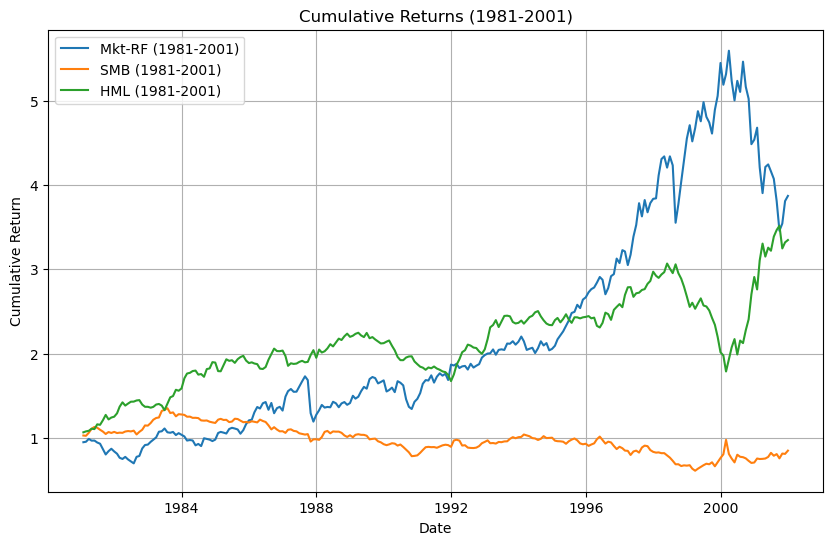

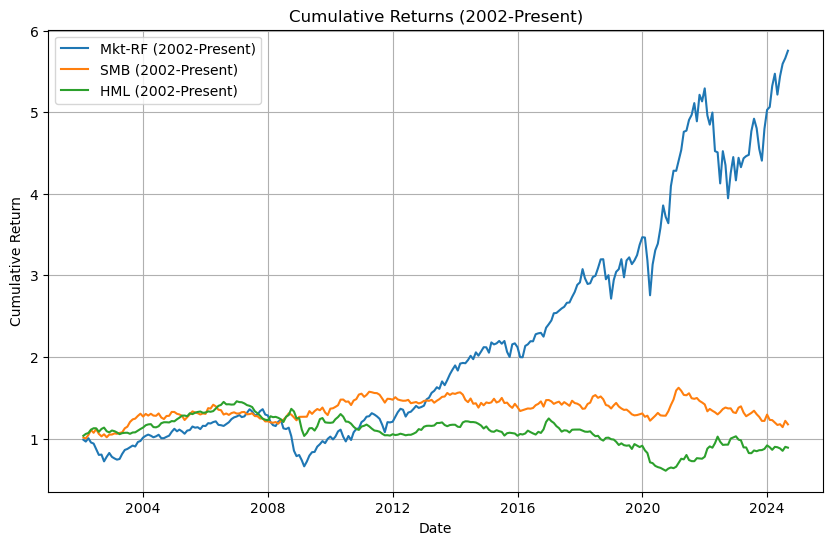

In [37]:
import matplotlib.pyplot as plt

# Separate data into two subsamples: 1981-2001 and 2002-present
subsample_1 = factors_data[(factors_data['Date'] >= '1981-01-01') & (factors_data['Date'] <= '2001-12-31')]
subsample_2 = factors_data[factors_data['Date'] >= '2002-01-01']

# Calculate cumulative returns for the three factors in both subsamples
subsample_1['Cumulative_Mkt_RF'] = (1 + subsample_1['Mkt-RF']).cumprod()
subsample_1['Cumulative_SMB'] = (1 + subsample_1['SMB']).cumprod()
subsample_1['Cumulative_HML'] = (1 + subsample_1['HML']).cumprod()

subsample_2['Cumulative_Mkt_RF'] = (1 + subsample_2['Mkt-RF']).cumprod()
subsample_2['Cumulative_SMB'] = (1 + subsample_2['SMB']).cumprod()
subsample_2['Cumulative_HML'] = (1 + subsample_2['HML']).cumprod()

# Plot the cumulative returns for the 1981-2001 subsample
plt.figure(figsize=(10, 6))
plt.plot(subsample_1['Date'], subsample_1['Cumulative_Mkt_RF'], label='Mkt-RF (1981-2001)')
plt.plot(subsample_1['Date'], subsample_1['Cumulative_SMB'], label='SMB (1981-2001)')
plt.plot(subsample_1['Date'], subsample_1['Cumulative_HML'], label='HML (1981-2001)')
plt.title('Cumulative Returns (1981-2001)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Plot the cumulative returns for the 2002-Present subsample
plt.figure(figsize=(10, 6))
plt.plot(subsample_2['Date'], subsample_2['Cumulative_Mkt_RF'], label='Mkt-RF (2002-Present)')
plt.plot(subsample_2['Date'], subsample_2['Cumulative_SMB'], label='SMB (2002-Present)')
plt.plot(subsample_2['Date'], subsample_2['Cumulative_HML'], label='HML (2002-Present)')
plt.title('Cumulative Returns (2002-Present)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

## 5

1981-2001 Subsample:

Mkt-RF performed well, showing strong cumulative growth. This indicates that the market risk premium was valuable during this period.
HML (value factor) also demonstrated significant cumulative returns, suggesting that value investing strategies were effective during this timeframe.
SMB (size factor) showed weak performance, with cumulative returns staying flat, indicating that small-cap stocks were not particularly valuable in this period.

2002-Present Subsample:

Mkt-RF continued to show substantial returns, particularly post-2008, reinforcing the importance of the market risk factor.
HML (value) performed poorly, showing stagnation and even negative returns at times. This suggests that value investing has been much less effective post-2001.
SMB (size) performed slightly better than in the previous period but still showed modest returns compared to the market.

In conclusion, Mkt-RF remains consistently valuable in both periods and should continue to be emphasized. HML (value) was valuable in 1981-2001 but has significantly underperformed since 2002, raising questions about its future emphasis. SMB (size) has shown limited returns across both periods, and its value as a factor is questionable. 

Recommendation: DFA should continue to emphasize Mkt-RF, but they may need to reconsider the weight placed on HML and SMB. Given the underperformance of HML post-2001, it might be prudent to reduce its emphasis, while SMB could be revisited to evaluate its ongoing relevance.

# 3. CAPM 

## 1. 

In [38]:
portfolios_data = pd.read_excel(file_path, sheet_name='portfolios (total returns)')
# portfolios_data['Date'] = pd.to_datetime(portfolios_data['Date'])
# portfolios_data.set_index('Date', inplace=True)
# portfolios_data = portfolios_data.loc['1981-01-01':]
portfolios_data.head()

,Date,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
0,1926-07-31,0.058248,-0.017006,0.004875,-0.014580,0.020534,0.012077,0.024192,0.004926,-0.026049,...,0.015893,0.015278,0.012978,0.002727,0.024678,0.034539,0.060902,0.020266,0.031111,0.005623
1,1926-08-31,-0.020206,-0.080282,0.013796,0.014606,0.083968,0.023618,-0.011849,0.040084,0.005038,...,0.013336,0.038730,0.020021,0.021706,0.053422,0.010124,0.041903,0.020131,0.054849,0.077576
2,1926-09-30,-0.048291,-0.026154,-0.043417,-0.032729,0.008649,-0.026540,-0.012618,0.010829,-0.035480,...,0.010923,-0.005250,-0.017636,0.014646,0.008730,-0.012906,0.036538,0.000950,-0.007487,-0.024284
3,1926-10-31,-0.093729,-0.035519,-0.034948,0.034413,-0.025476,-0.028069,-0.032663,-0.050745,-0.080191,...,-0.033361,-0.026559,-0.021070,-0.031051,-0.053525,-0.027413,-0.030071,-0.022437,-0.046719,-0.058129
4,1926-11-30,0.055888,0.041877,0.024623,-0.044494,0.005362,0.031033,-0.023690,0.030078,0.051546,...,0.034448,0.023887,0.037335,0.049320,0.018213,0.042946,0.025326,0.015204,0.036619,0.025636


In [39]:
import pandas as pd
import numpy as np

portfolios_data['Date'] = pd.to_datetime(portfolios_data['Date'])
factors_data['Date'] = pd.to_datetime(factors_data['Date'])

portfolios_data.set_index('Date', inplace=True)
factors_data.set_index('Date', inplace=True)

# Filter for 1981-present
portfolios_data_1981 = portfolios_data.loc['1981-01-01':]
rf_rate_1981 = factors_data['RF'].loc['1981-01-01':]

print(portfolios_data_1981.index.equals(rf_rate_1981.index))  
rf_rate_1981_aligned = rf_rate_1981.reindex(portfolios_data_1981.index)

# Now subtract the risk-free rate from total returns to get excess returns
excess_returns_1981 = portfolios_data_1981.subtract(rf_rate_1981_aligned, axis=0)

# Function to compute summary statistics
def compute_statistics(df):
    mean = df.mean() * 12  # annualized mean
    volatility = df.std() * np.sqrt(12)  # annualized volatility
    sharpe = mean / volatility  # Sharpe ratio
    var_5 = df.quantile(0.05)  # 5% Value at Risk (VaR)
    return mean, volatility, sharpe, var_5

# Calculate summary statistics for each portfolio
summary_stats = {}
for column in excess_returns_1981.columns:
    mean, volatility, sharpe, var_5 = compute_statistics(excess_returns_1981[column])
    summary_stats[column] = {'Mean': mean, 'Volatility': volatility, 'Sharpe': sharpe, 'VaR(5%)': var_5}

summary_df = pd.DataFrame(summary_stats).T
summary_df

True


,Mean,Volatility,Sharpe,VaR(5%)
SMALL LoBM,0.006671,0.273771,0.024366,-0.126059
ME1 BM2,0.088689,0.236403,0.375163,-0.094747
ME1 BM3,0.092006,0.201252,0.457170,-0.086227
ME1 BM4,0.115998,0.194270,0.597099,-0.076972
SMALL HiBM,0.127838,0.210037,0.608646,-0.088535
ME2 BM1,0.058868,0.245156,0.240125,-0.104096
ME2 BM2,0.100515,0.205528,0.489059,-0.085661
ME2 BM3,0.105946,0.185777,0.570288,-0.078490
ME2 BM4,0.108835,0.182098,0.597670,-0.076138
ME2 BM5,0.115994,0.215616,0.537967,-0.096398


The portfolios with higher book-to-market ratios (value stocks) tend to have better performance, both in terms of mean returns and risk-adjusted returns (Sharpe ratio), such as SMALL HiBM and ME2 BM4.
Small-cap stocks (e.g., SMALL LoBM) have higher volatility and worse risk-adjusted returns.
Larger-cap portfolios (e.g., BIG LoBM) tend to have lower volatility and lower VaR, which makes them less risky.
This analysis indicates that value portfolios tend to outperform growth portfolios in terms of both mean returns and Sharpe ratios, while also being less volatile.

## 2. 

(a)

In [40]:
import statsmodels.api as sm
import pandas as pd

# Prepare the independent variable (Mkt-RF) for the regression (adding a constant for alpha)
X = sm.add_constant(factors_data['Mkt-RF'])

# Store results for alphas and betas
alphas = []
betas = []

for column in portfolios_data.columns[1:]: 
    y = portfolios_data[column] - factors_data['RF']  # Excess returns for each portfolio
    
    # Run regression
    model = sm.OLS(y, X).fit()
    
    # Extract alpha and beta
    alpha = model.params['const']
    beta = model.params['Mkt-RF']
    
    # Store results
    alphas.append(alpha)
    betas.append(beta)

# Prepare results for display
alpha_beta_results = pd.DataFrame({
    'Portfolio': portfolios_data.columns[1:],  # Portfolio names
    'Alpha': alphas,
    'Beta': betas
})

# Display the results
print(alpha_beta_results)


     Portfolio     Alpha      Beta
0      ME1 BM2 -0.002804  1.392075
1      ME1 BM3  0.000507  1.392537
2      ME1 BM4  0.002792  1.258251
3   SMALL HiBM  0.004104  1.359165
4      ME2 BM1 -0.002346  1.268737
5      ME2 BM2  0.000958  1.225856
6      ME2 BM3  0.001452  1.196331
7      ME2 BM4  0.002103  1.204818
8      ME2 BM5  0.003021  1.373805
9      ME3 BM1 -0.001397  1.247940
10     ME3 BM2  0.001302  1.125917
11     ME3 BM3  0.001536  1.118224
12     ME3 BM4  0.002104  1.172990
13     ME3 BM5  0.001735  1.354587
14     ME4 BM1 -0.000077  1.087725
15     ME4 BM2  0.000472  1.089456
16     ME4 BM3  0.000955  1.098300
17     ME4 BM4  0.001584  1.163564
18     ME4 BM5  0.000845  1.390156
19    BIG LoBM  0.000270  0.960912
20     ME5 BM2  0.000005  0.941852
21     ME5 BM3  0.000579  0.964907
22     ME5 BM4 -0.000865  1.097018
23    BIG HiBM  0.000548  1.299343


(b)

In [41]:
import numpy as np

mae_values = []

for column in portfolios_data.columns[1:]: 
    y = portfolios_data[column] - factors_data['RF']  # Excess returns for each portfolio
    
    # Run regression
    model = sm.OLS(y, X).fit()
    
    # Calculate residuals and MAE
    residuals = model.resid
    mae = np.mean(np.abs(residuals))
  
    mae_values.append(mae)

mae_results = pd.DataFrame({
    'Portfolio': portfolios_data.columns[1:],  
    'MAE': mae_values
})

print(mae_results)


     Portfolio       MAE
0      ME1 BM2  0.037854
1      ME1 BM3  0.034762
2      ME1 BM4  0.030097
3   SMALL HiBM  0.034595
4      ME2 BM1  0.029651
5      ME2 BM2  0.023843
6      ME2 BM3  0.021983
7      ME2 BM4  0.023815
8      ME2 BM5  0.031353
9      ME3 BM1  0.022386
10     ME3 BM2  0.017849
11     ME3 BM3  0.017890
12     ME3 BM4  0.020687
13     ME3 BM5  0.029090
14     ME4 BM1  0.015714
15     ME4 BM2  0.013427
16     ME4 BM3  0.015791
17     ME4 BM4  0.019731
18     ME4 BM5  0.029664
19    BIG LoBM  0.011672
20     ME5 BM2  0.011144
21     ME5 BM3  0.014879
22     ME5 BM4  0.019892
23    BIG HiBM  0.031752


(c)

In [42]:
treynor_ratios = []
information_ratios = []
betas = []  

for column in portfolios_data.columns[1:]:  
    y = portfolios_data[column] - factors_data['RF']  # Excess returns for each portfolio
    
    # Run regression
    model = sm.OLS(y, X).fit()
    
    # Extract alpha, beta, and residuals
    alpha = model.params['const']
    beta = model.params['Mkt-RF']
    residuals = model.resid
    
    # Store the beta value
    betas.append(beta)
    
    # Calculate Treynor ratio (mean excess return / beta)
    mean_excess_return = np.mean(y)
    treynor_ratio = mean_excess_return / beta
    
    # Calculate Information ratio (alpha / std deviation of residuals)
    std_residuals = np.std(residuals)
    information_ratio = alpha / std_residuals if std_residuals != 0 else np.nan  # Avoid division by zero

    treynor_ratios.append(treynor_ratio)
    information_ratios.append(information_ratio)


ratios_results = pd.DataFrame({
    'Portfolio': portfolios_data.columns[1:],  # Portfolio names
    'Beta': betas,  
    'Treynor Ratio': treynor_ratios,
    'Information Ratio': information_ratios
})

# Display the results
print(ratios_results)

     Portfolio      Beta  Treynor Ratio  Information Ratio
0      ME1 BM2  1.392075       0.004839          -0.045075
1      ME1 BM3  1.392537       0.007217           0.009412
2      ME1 BM4  1.258251       0.009072           0.058054
3   SMALL HiBM  1.359165       0.009873           0.071983
4      ME2 BM1  1.268737       0.005004          -0.055847
5      ME2 BM2  1.225856       0.007635           0.026519
6      ME2 BM3  1.196331       0.008067           0.043246
7      ME2 BM4  1.204818       0.008599           0.058309
8      ME2 BM5  1.373805       0.009052           0.065199
9      ME3 BM1  1.247940       0.005734          -0.043544
10     ME3 BM2  1.125917       0.008009           0.054860
11     ME3 BM3  1.118224       0.008227           0.061168
12     ME3 BM4  1.172990       0.008647           0.068629
13     ME3 BM5  1.354587       0.008133           0.040997
14     ME4 BM1  1.087725       0.006782          -0.003487
15     ME4 BM2  1.089456       0.007287           0.0251

(d)

The significant variation in Treynor Ratios, the presence of non-zero alphas, and non-zero Information Ratios indicate that CAPM is not fully explaining the returns of these portfolios. This suggests that factors other than just market risk are at play, such as size, value, or other risk factors, as proposed by models like the Fama-French three-factor model.

## 3.

In [43]:
import pandas as pd
import statsmodels.api as sm

# Define the betas and mean excess returns from your previous result
betas = [1.392075, 1.392537, 1.258251, 1.359165, 1.268737, 1.225856, 1.196331, 
         1.204818, 1.373805, 1.247940, 1.125917, 1.118224, 1.172990, 1.354587, 
         1.087725, 1.089456, 1.098300, 1.163564, 1.390156, 0.960912, 0.941852, 
         0.964907, 1.097018, 1.299343]

mean_excess_returns = [0.006671, 0.088689, 0.092006, 0.115998, 0.127838, 0.058868, 
                       0.100515, 0.105946, 0.108835, 0.115994, 0.070988, 0.107164, 
                       0.092339, 0.108758, 0.123854, 0.092356, 0.095974, 0.092687, 
                       0.101693, 0.108216, 0.093934, 0.085241, 0.082494, 0.099289]

# Create a DataFrame from the values
regression_data = pd.DataFrame({
    'Beta': betas,
    'Mean': mean_excess_returns
})

# Perform the cross-sectional regression
X = sm.add_constant(regression_data['Beta'])
model = sm.OLS(regression_data['Mean'], X).fit()

# Extract the regression results
r_squared = model.rsquared
intercept_eta = model.params[0]
lambda_m = model.params[1]

# Display the results
print(f"R-squared: {r_squared}")
print(f"Intercept (η): {intercept_eta}")
print(f"Regression Coefficient (λ_m): {lambda_m}")


R-squared: 0.009947149916028186
Intercept (η): 0.11573919521008089
Regression Coefficient (λ_m): -0.01741889827110015


## 4. 

The low R-squared, positive intercept, and negative market risk premium all point to the fact that the CAPM is not fully capturing the risk premia in these size and value portfolios. This aligns with DFA's belief that there are additional factors (such as size and value) that generate returns beyond what is explained by market risk alone (CAPM beta).

In summary, these results support DFA's investment philosophy that size and value portfolios contain premia unrelated to the CAPM, implying that other factors, such as size and value, are important in explaining returns.

# 4. Extensions

## 1. 

In [44]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Use the excess returns for the 25 portfolios (ensure it's already adjusted by subtracting risk-free rate)
# Assuming portfolio_excess_returns is the DataFrame containing excess returns for each of the 25 portfolios
portfolio_excess_returns = portfolios_data.sub(factors_data['RF'], axis=0)  # Subtract RF column to get excess returns

# Step 1: Calculate mean and covariance of excess returns
mean_returns = portfolio_excess_returns.mean()
cov_matrix = portfolio_excess_returns.cov()

# Step 2: Define the negative Sharpe ratio objective function
def negative_sharpe(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility
    return -sharpe_ratio

# Step 3: Set constraints (weights sum to 1) and bounds (weights between 0 and 1)
num_assets = len(mean_returns)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))

# Step 4: Initial guess (equal weights)
initial_guess = num_assets * [1. / num_assets]

# Step 5: Optimize to find the tangency portfolio weights
optimal_solution = minimize(negative_sharpe, initial_guess, args=(mean_returns, cov_matrix),
                            method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = optimal_solution.x
print("Optimal Weights for Tangency Portfolio:", optimal_weights)

# Step 6: Calculate the Tangency Portfolio returns
tangency_portfolio_return = np.dot(portfolio_excess_returns, optimal_weights)


Optimal Weights for Tangency Portfolio: [5.95961138e-17 1.50727568e-16 0.00000000e+00 0.00000000e+00
 3.94675176e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.86150722e-04 7.95391288e-17 0.00000000e+00
 0.00000000e+00 2.48172783e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.56565890e-01 0.00000000e+00 6.53374208e-17 3.22581435e-17
 5.33370190e-17]
